In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from scipy.stats import norm, skew
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READING
train = pd.read_csv("D:/R/House Prices kaggle/train.csv")
test = pd.read_csv("D:/R/House Prices kaggle/test.csv")

In [3]:
# BINDING
master=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,master.shape)
master.head()

(1460, 81) (1459, 80) (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
#CHECK NA#
sd=master.isnull().sum()/len(master)*100
sd.tail(50)

BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.034258
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.034258
TotRmsAbvGrd      0.000000
Functional        0.068517
Fireplaces        0.000000
FireplaceQu      48.646797
GarageType        5.378554
GarageYrBlt       5.447071
GarageFinish      5.447071
GarageCars        0.034258
GarageArea        0.034258
GarageQual        5.447071
GarageCond        5.447071
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
E

In [5]:
# Check column names
print(master.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# CHECK UNIQUE VALUES

master.apply(lambda x : len(x.unique()))

Id               2919
MSSubClass         16
MSZoning            6
LotFrontage       129
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType           10
SaleCondition       6
SalePrice         664
Length: 81, dtype: int64

# SEPEARATION#

In [7]:
## SEPEARTION CATEGORY VS NUMERIC

cat=['MSZoning','Street','Alley','LotShape','LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive','PoolQC','MSSubClass',
       'Fence', 'MiscFeature','SaleType','SaleCondition','OverallQual', 'OverallCond','GarageCars']


num=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath','1stFlrSF', '2ndFlrSF','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','SalePrice']



final=master[num+cat]


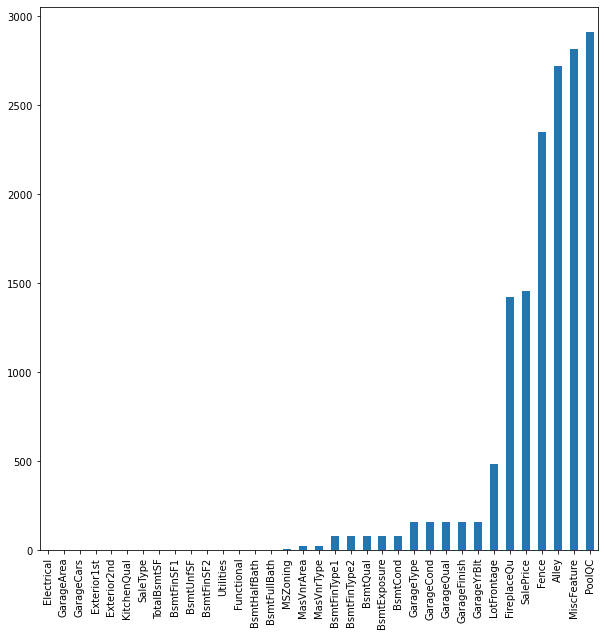

In [8]:
#missing values
fig = plt.figure(figsize=(10,10))
missing = master.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [9]:
### VALUE COUNTS MULTIPLE COLUMN##
for i in master.columns:
    x=master[i].value_counts()
    print("Column name is:",i,"and it value is:",x)

Column name is: Id and it value is: 2047    1
1088    1
1084    1
1082    1
1080    1
       ..
2532    1
483     1
2530    1
481     1
2049    1
Name: Id, Length: 2919, dtype: int64
Column name is: MSSubClass and it value is: 20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
Column name is: MSZoning and it value is: RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Column name is: LotFrontage and it value is: 60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64
Column name is: LotArea and it value is: 9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292

In [10]:
# DEALING WITH IMPUTAION CHECKPOINTS
tu={'MasVnrArea','GarageArea','LotFrontage','GarageYrBlt','GarageCars','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF'}
for d in tu:
    y=master[d].describe()
    print(y)
    

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: 

In [11]:
#MSVNR MISSING
dd=master[master['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]
dd


,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [12]:
# LOT MISSING
sd=master[master['LotFrontage'].isnull()][['LotFrontage','LotArea','LotShape']]
sd


,LotFrontage,LotArea,LotShape
7,NaN,10382,IR1
12,NaN,12968,IR2
14,NaN,10920,IR1
16,NaN,11241,IR1
24,NaN,8246,IR1
...,...,...,...
2847,NaN,11088,Reg
2850,NaN,21533,IR2
2900,NaN,50102,IR1
2901,NaN,8098,IR1


In [13]:
# BSMT missing
sd=master[master['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
sd

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2803,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2824,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2891,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [14]:
##CHECK GARAGES MISSING###

sy=master[master['GarageYrBlt'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
sy

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2893,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2909,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2913,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2914,NaN,NaN,NaN,0.0,0.0,NaN,NaN


# MISSING VALUE TREATMENT#

In [15]:

                  ### GIVEN IN DATA DICTIONRAY THAT NA MEANS None FOR SOME VARIABLES
                  ## IMPUTE 2-3 NA WITH mode i.e For some Categorical Variables##
                  ### IMPUTE 4-5 NA i.e Numeric some with mean some with median
### IMPUTE GARAGE BUILD 0 As all are garage variable are no and zero so imput garge yr built 0 means not built###
## IMPUTE LOT FRONTAGE WITH RESPECT TO ITS NEIGHBOURHOOD as since area of each street connected to....
##                                         house property likely have same area with respect to its neigbour

#1.MSVNR AND MIS FEATURE.....

ln={'MiscFeature','MasVnrType','Alley','PoolQC','Fence'}
for i in ln:
    master[i].fillna('None',inplace=True)
    
#DEFINING DEICTIONARIES 
Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
Grg = ['GarageType','GarageFinish','GarageQual','GarageCond']

#2.BSMTS
for col in Bsmt:
    master[col].fillna('No_Bsmt',inplace=True)
    
#3.GRGES    
for col in Grg:
    master[col].fillna('No_Grg',inplace=True)    
    

#4.FIRE PLACES
master['FireplaceQu'] = master['FireplaceQu'].fillna('NotAvailable')

#5.IMPUTE WITH MEDIAN or 0  DUE TO 1-3 NA IN EACH VARIABLRS AS THESE ARE IN CATEGORIES 

tt={'BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF'}
for c in tt:
    master[c] = master[c].fillna(0)

    
    
#6.IMPUTE WITH MODE WHICH LEADS TO HIGH FREQUENCY VARIABLES 

ts={'Exterior1st','Exterior2nd','KitchenQual','Functional','MSZoning','Utilities','Electrical','SaleType','MSZoning'}
for i in ts:
    master[i].fillna(master[i].mode,inplace=True)
 
       
#7.MSVNR AREA # DUE TO 0 MEAN AND 0 MEDIAN
master.MasVnrArea = master.MasVnrArea.fillna(0)

    
#8.Garages   

for col in ('GarageArea', 'GarageCars'):
    master[col] = master[col].fillna(0)

#9.LOT FRONTAGE

master["LotFrontage"] = master.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


#OUTLIER HANDLER
def out_quant(x):
    d=np.arange(0,1,0.01)
    ds=x.quantile(d)
    return ds


#OVERFIT HANDLER
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit

#10.GARAGE YR BLT
master.GarageYrBlt = KNNImputer(n_neighbors=55, weights="uniform").fit_transform(master[['GarageYrBlt']])

# EDA#

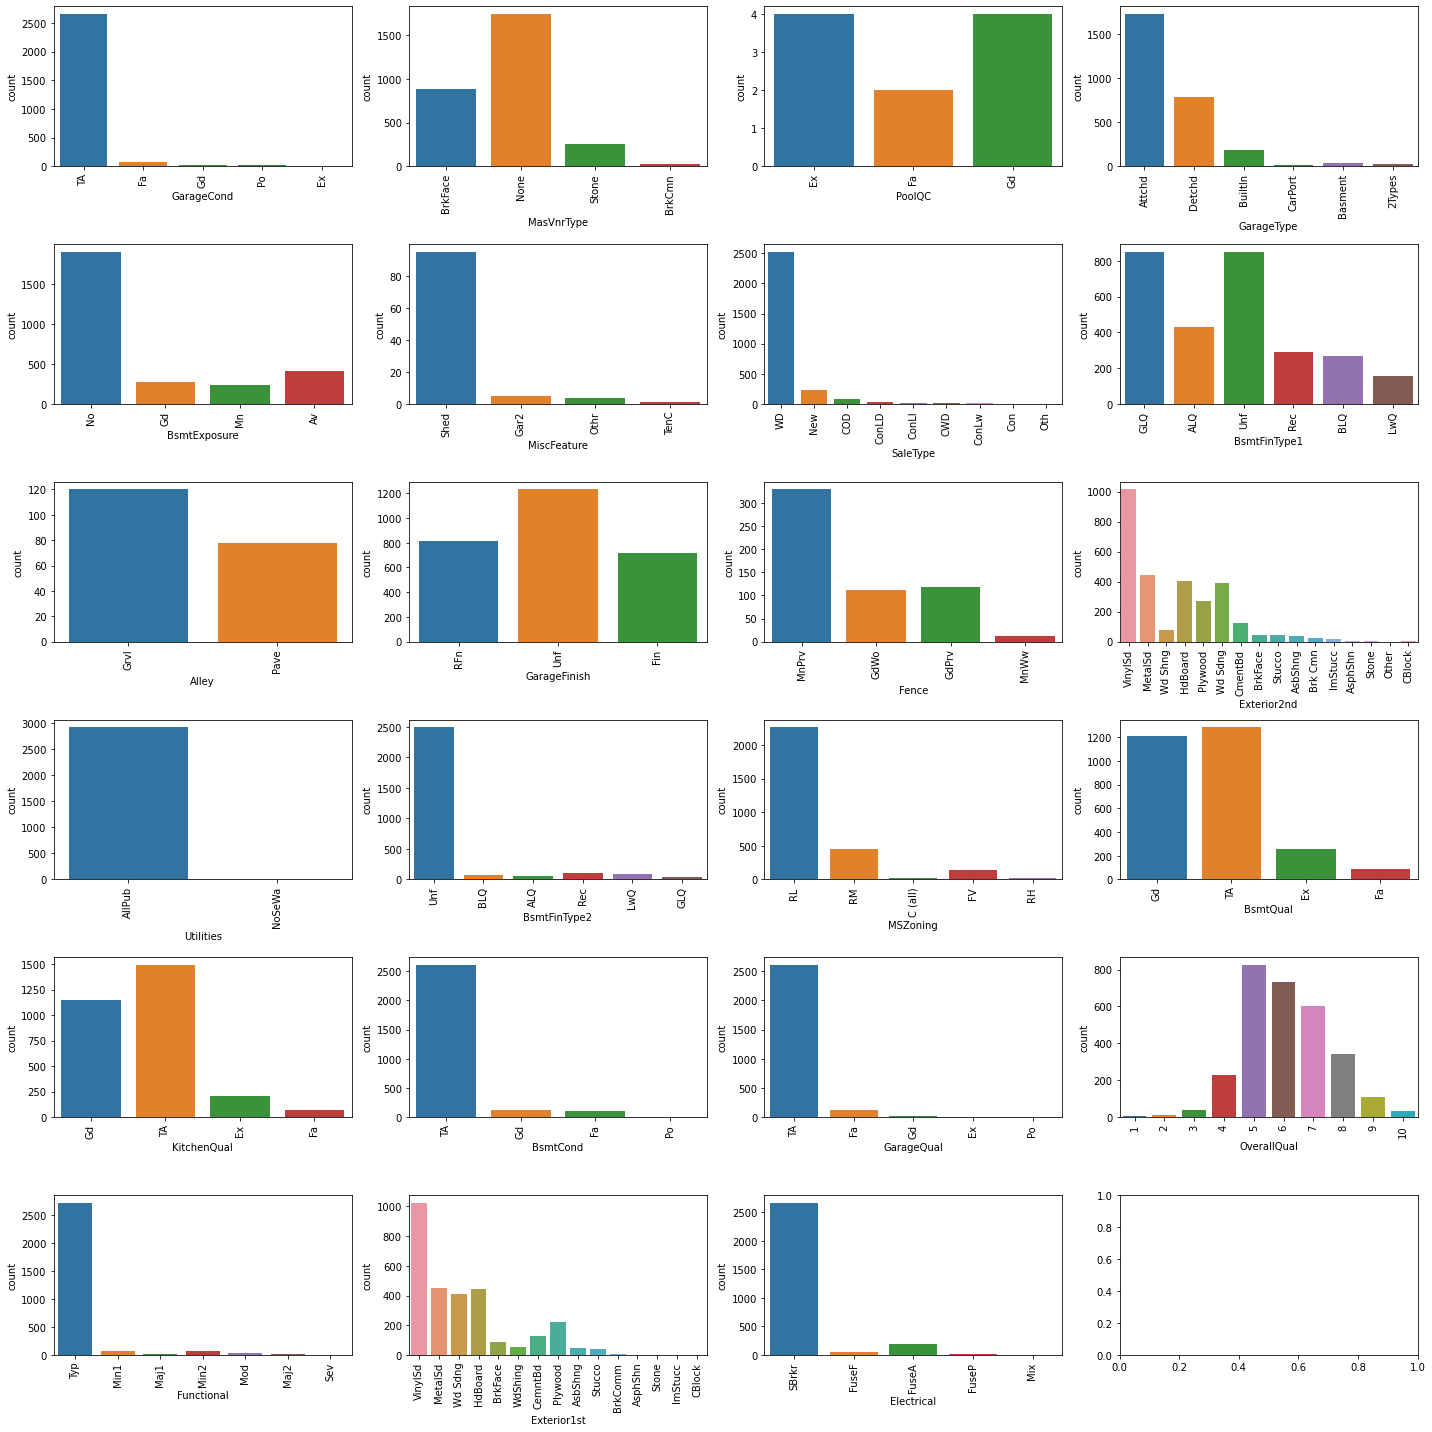

In [16]:
## Categorical Variables
cat={'Exterior1st','Exterior2nd','KitchenQual','Functional','MSZoning','Utilities','Electrical','SaleType','MSZoning',
        'GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
        ,'MiscFeature','MasVnrType','Alley','PoolQC','Fence','OverallQual'}

fig, ax=plt.subplots(6,4,figsize=(20,20))
for variable,subplot in zip(cat,ax.flatten()):
    sns.countplot(final[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
               
plt.tight_layout()
plt.show()

SalePrice in Thousands ('000)

--------------------GarageCond  vs  SalePrice--------------------


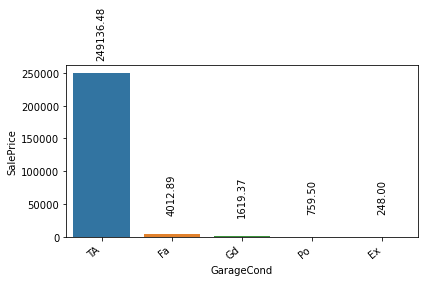


Maximum Sales : 
             SalePrice
GarageCond            
TA          249136.485

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------MasVnrType  vs  SalePrice--------------------


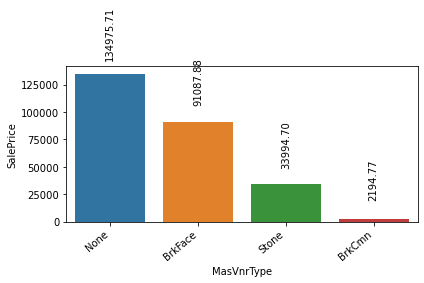


Maximum Sales : 
             SalePrice
MasVnrType            
None        134975.714

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------PoolQC  vs  SalePrice--------------------


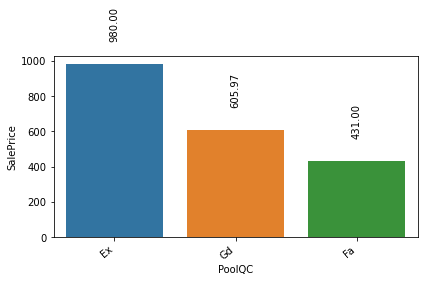


Maximum Sales : 
        SalePrice
PoolQC           
Ex          980.0

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------GarageType  vs  SalePrice--------------------


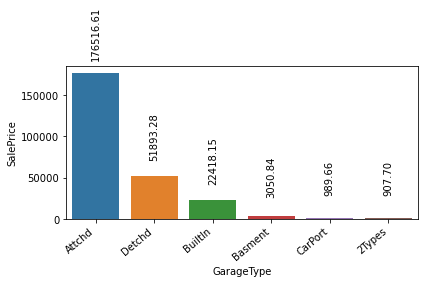


Maximum Sales : 
             SalePrice
GarageType            
Attchd      176516.611

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtExposure  vs  SalePrice--------------------


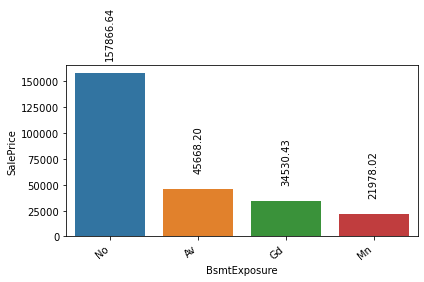


Maximum Sales : 
               SalePrice
BsmtExposure            
No            157866.638

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------MiscFeature  vs  SalePrice--------------------


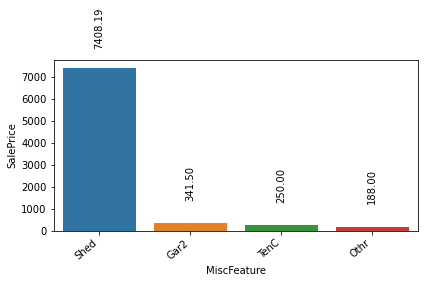


Maximum Sales : 
             SalePrice
MiscFeature           
Shed          7408.193

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------SaleType  vs  SalePrice--------------------


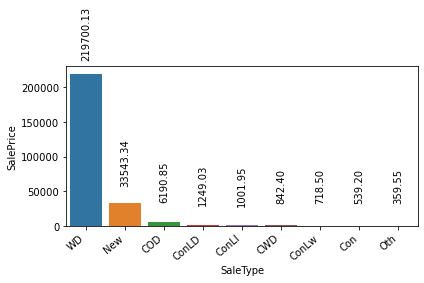


Maximum Sales : 
           SalePrice
SaleType            
WD        219700.127

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtFinType1  vs  SalePrice--------------------


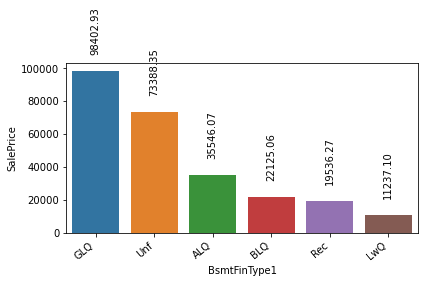


Maximum Sales : 
              SalePrice
BsmtFinType1           
GLQ           98402.935

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Alley  vs  SalePrice--------------------


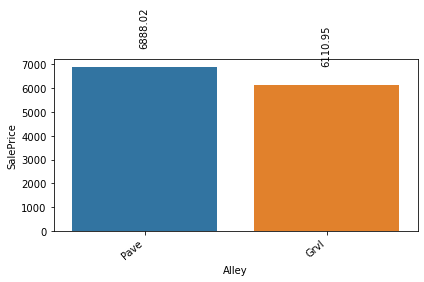


Maximum Sales : 
       SalePrice
Alley           
Pave    6888.024

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------GarageFinish  vs  SalePrice--------------------


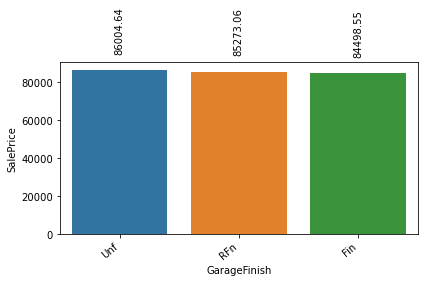


Maximum Sales : 
              SalePrice
GarageFinish           
Unf           86004.636

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Fence  vs  SalePrice--------------------


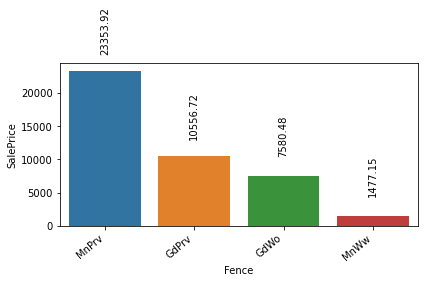


Maximum Sales : 
       SalePrice
Fence           
MnPrv  23353.921

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Exterior2nd  vs  SalePrice--------------------


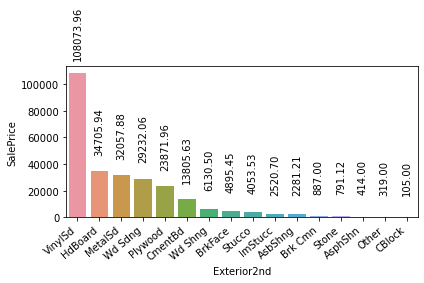


Maximum Sales : 
             SalePrice
Exterior2nd           
VinylSd      108073.96

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Utilities  vs  SalePrice--------------------


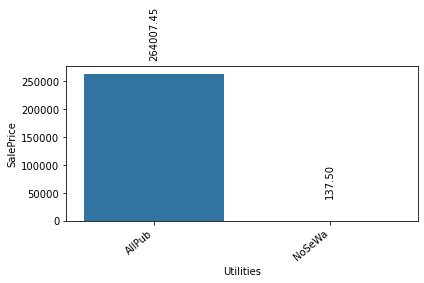


Maximum Sales : 
            SalePrice
Utilities            
AllPub     264007.446

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtFinType2  vs  SalePrice--------------------


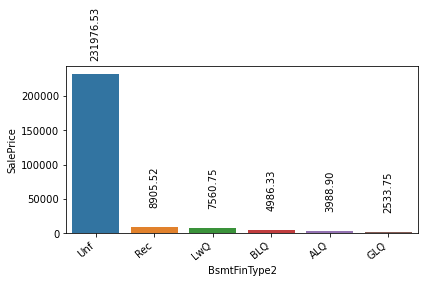


Maximum Sales : 
               SalePrice
BsmtFinType2            
Unf           231976.531

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------MSZoning  vs  SalePrice--------------------


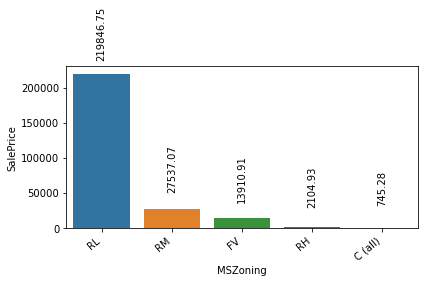


Maximum Sales : 
           SalePrice
MSZoning            
RL        219846.749

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtQual  vs  SalePrice--------------------


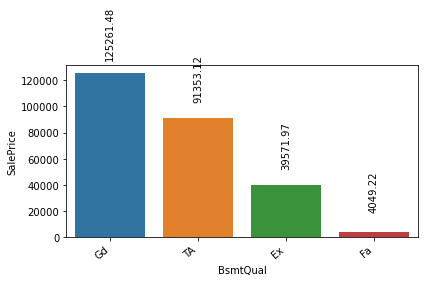


Maximum Sales : 
          SalePrice
BsmtQual           
Gd        125261.48

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------KitchenQual  vs  SalePrice--------------------


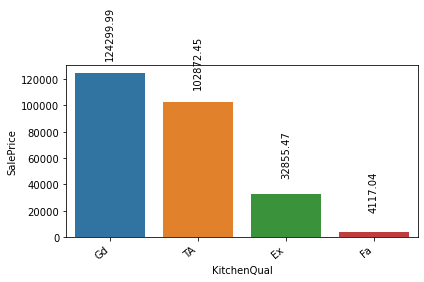


Maximum Sales : 
             SalePrice
KitchenQual           
Gd           124299.99

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtCond  vs  SalePrice--------------------


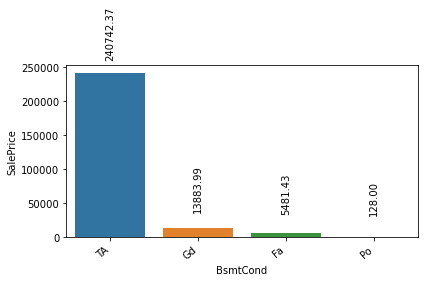


Maximum Sales : 
           SalePrice
BsmtCond            
TA        240742.366

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------GarageQual  vs  SalePrice--------------------


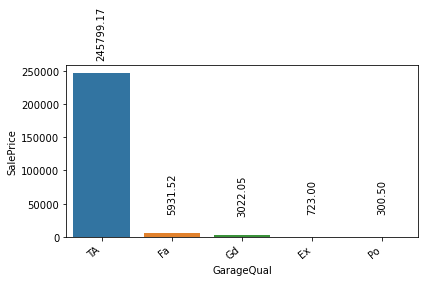


Maximum Sales : 
             SalePrice
GarageQual            
TA          245799.175

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------OverallQual  vs  SalePrice--------------------


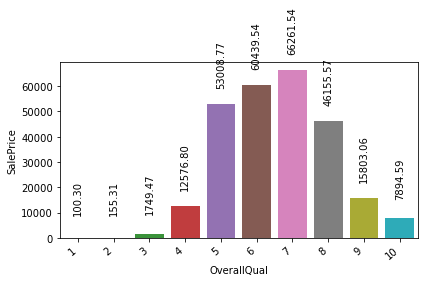


Maximum Sales : 
             SalePrice
OverallQual           
7            66261.539

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Functional  vs  SalePrice--------------------


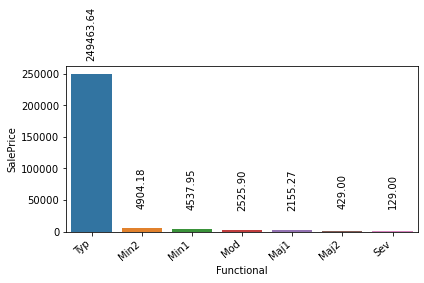


Maximum Sales : 
            SalePrice
Functional           
Typ         249463.64

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Exterior1st  vs  SalePrice--------------------


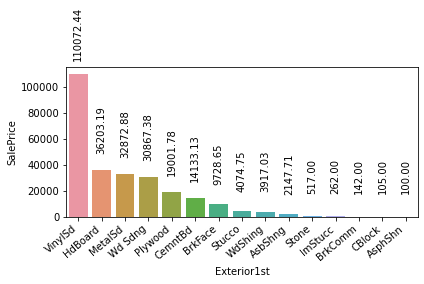


Maximum Sales : 
              SalePrice
Exterior1st            
VinylSd      110072.444

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Electrical  vs  SalePrice--------------------


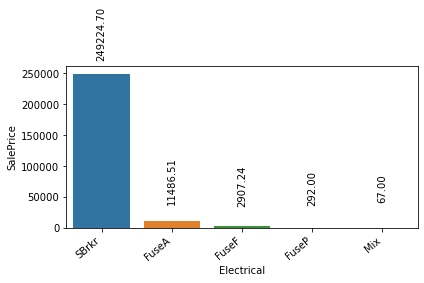


Maximum Sales : 
             SalePrice
Electrical            
SBrkr       249224.701

--------------------------------------------------


In [17]:
##################### CATEGORY VS TRAGET VISUALISATIONS###################################### 

    
for cat in cat:
    print("SalePrice in Thousands ('000)")
    print()
    print("-"*20 + cat + '  vs' + '  SalePrice' + "-"*20)
    output = final[[cat,'SalePrice']].groupby([cat]).apply(lambda x: x['SalePrice'].sum()/1000).sort_values(ascending=False)
    output = pd.DataFrame(output)
    output.columns = ['SalePrice']
    ax = sns.barplot(output.index,'SalePrice', data =output)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/ 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0,40), textcoords='offset points')  #vertical bars
    
    plt.tight_layout()
    plt.show()
    print()
    print("Maximum Sales : ")
    print(output.head(1))
    print()
    print("-" *50)
   
   
    
  ############ALL DATA ARE CLEANED NOW#####################  

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


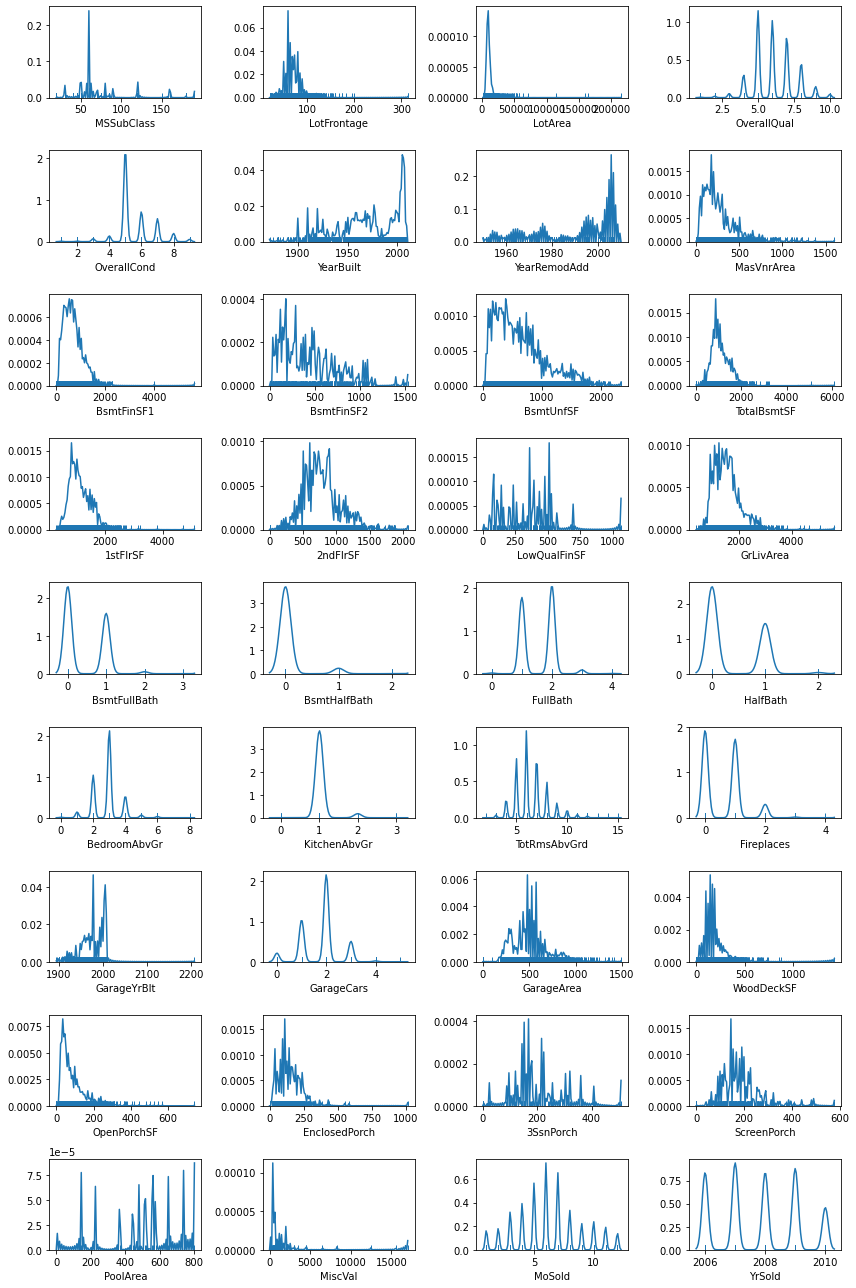

In [18]:
#NUMERICAL#
master['Id']=master['Id'].astype(str)
numerical_features = master.select_dtypes(exclude=['object']).drop(['SalePrice'], axis=1).copy()
print(numerical_features.columns)
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna(), rug=True, hist=False, kde_kws={'bw':0.1})
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

# UNIVARIATE ANALYSIS#

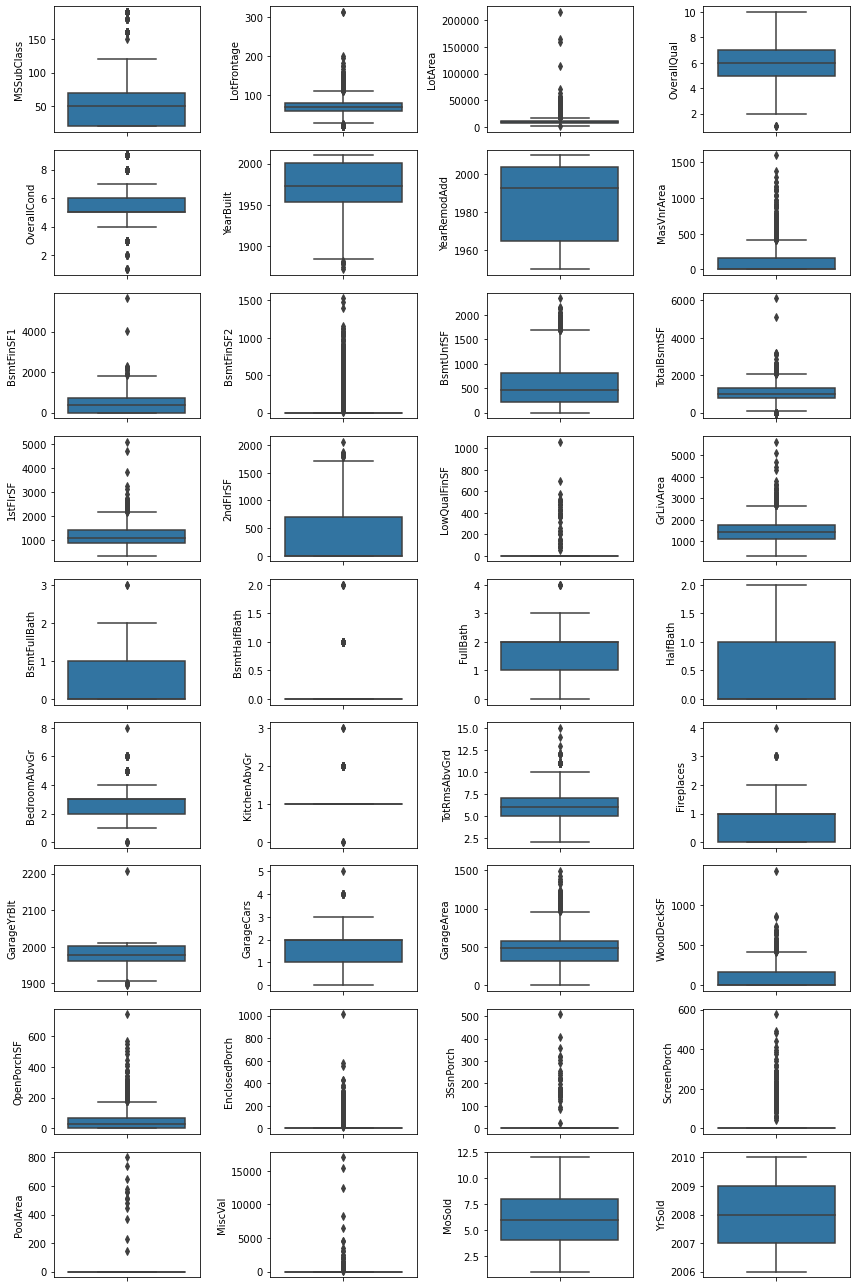

In [19]:
######BOXPLOTS VISUALISATION####
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS#

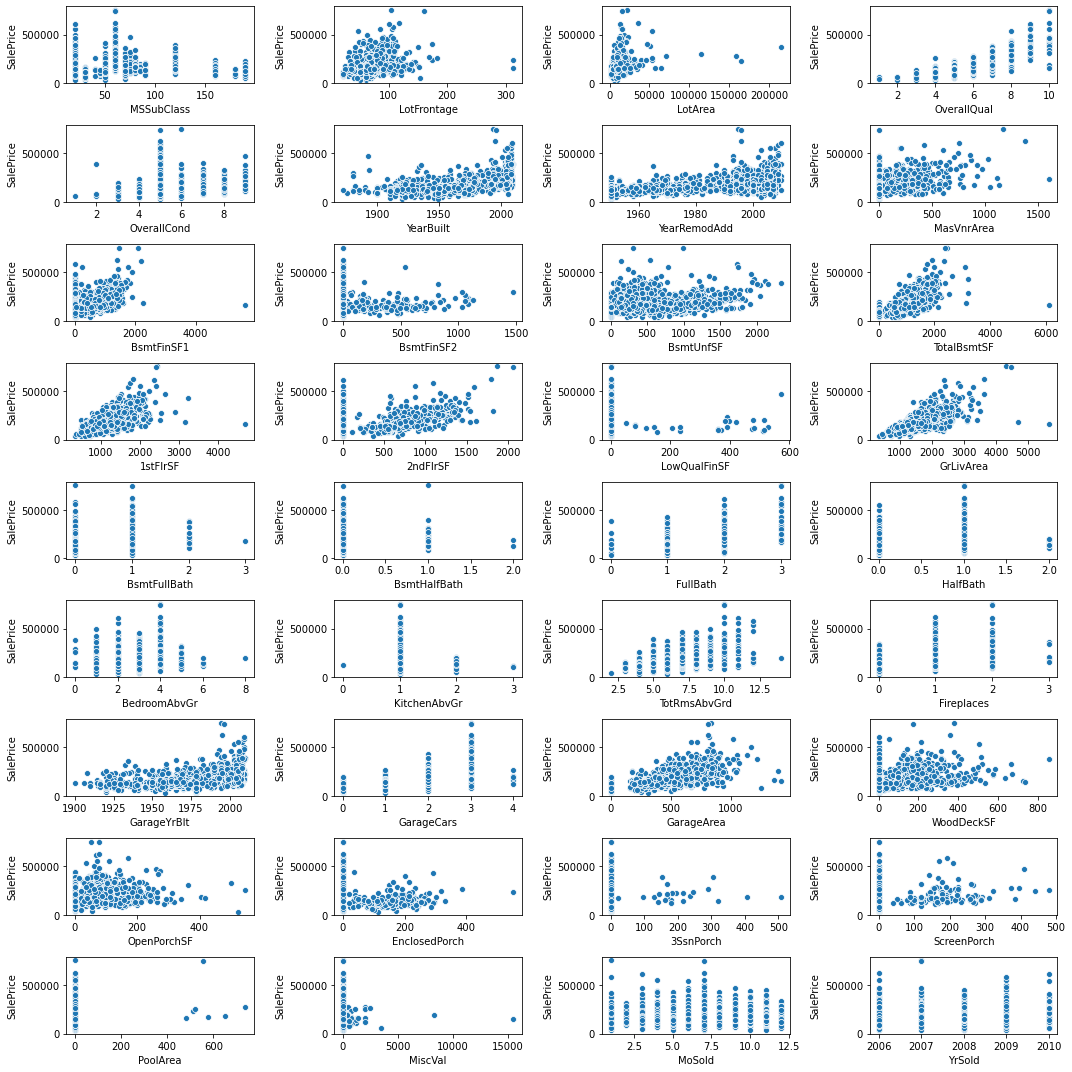

In [20]:
#SCATTER PLOT#
fig = plt.figure(figsize=(15,15))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],master['SalePrice'])
plt.tight_layout()
plt.show()

# OUTLIER EXTREME VAUE#

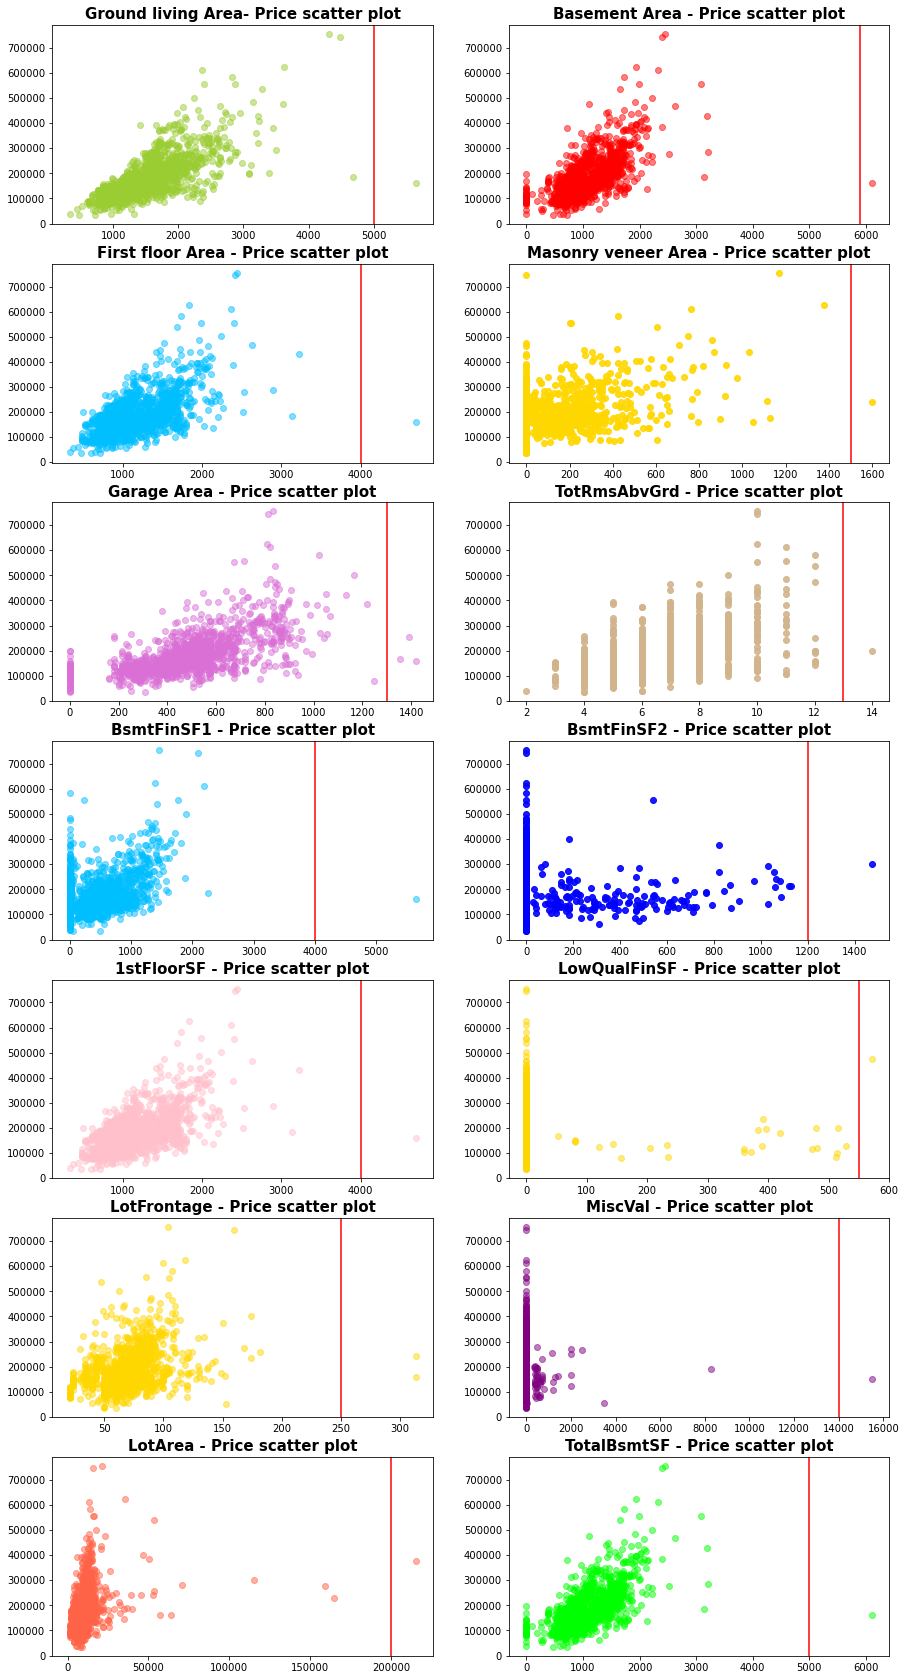

In [21]:
##############OUTLIER FINDING###############

fig = plt.figure(figsize=(15,30))
ax1 = plt.subplot2grid((7,2),(0,0))
plt.scatter(x=master['GrLivArea'], y=master['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=5000, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((7,2),(0,1))
plt.scatter(x=master['TotalBsmtSF'], y=master['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )


ax1 = plt.subplot2grid((7,2),(1,0))
plt.scatter(x=master['1stFlrSF'], y=master['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((7,2),(1,1))
plt.scatter(x=master['MasVnrArea'], y=master['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((7,2),(2,0))
plt.scatter(x=master['GarageArea'], y=master['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1300, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((7,2),(2,1))
plt.scatter(x=master['TotRmsAbvGrd'], y=master['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )


ax1 = plt.subplot2grid((7,2),(3,0))
plt.scatter(x=master['BsmtFinSF1'], y=master['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('BsmtFinSF1 - Price scatter plot', fontsize=15, weight='bold' )


ax1 = plt.subplot2grid((7,2),(3,1))
plt.scatter(x=master['BsmtFinSF2'], y=master['SalePrice'], color=('blue'),alpha=0.9)
plt.axvline(x=1200, color='r', linestyle='-')
plt.title('BsmtFinSF2 - Price scatter plot', fontsize=15, weight='bold' )


ax1 = plt.subplot2grid((7,2),(4,0))
plt.scatter(x=master['1stFlrSF'], y=master['SalePrice'], color=('pink'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('1stFloorSF - Price scatter plot', fontsize=15, weight='bold' )


ax1 = plt.subplot2grid((7,2),(4,1))
plt.scatter(x=master['LowQualFinSF'], y=master['SalePrice'], color=('gold'),alpha=0.5)
plt.axvline(x=550, color='r', linestyle='-')
plt.title('LowQualFinSF - Price scatter plot', fontsize=15, weight='bold' )



ax1 = plt.subplot2grid((7,2),(5,0))
plt.scatter(x=master['LotFrontage'], y=master['SalePrice'], color=('gold'),alpha=0.5)
plt.axvline(x=250, color='r', linestyle='-')
plt.title('LotFrontage - Price scatter plot', fontsize=15, weight='bold' )



ax1 = plt.subplot2grid((7,2),(5,1))
plt.scatter(x=master['MiscVal'], y=master['SalePrice'], color=('purple'),alpha=0.5)
plt.axvline(x=14000, color='r', linestyle='-')
plt.title('MiscVal - Price scatter plot', fontsize=15, weight='bold' )



ax1 = plt.subplot2grid((7,2),(6,0))
plt.scatter(x=master['LotArea'], y=master['SalePrice'], color=('tomato'),alpha=0.5)
plt.axvline(x=200000, color='r', linestyle='-')
plt.title('LotArea - Price scatter plot', fontsize=15, weight='bold' )



ax1 = plt.subplot2grid((7,2),(6,1))
plt.scatter(x=master['TotalBsmtSF'], y=master['SalePrice'], color=('lime'),alpha=0.5)
plt.axvline(x=5000, color='r', linestyle='-')
plt.title('TotalBsmtSF - Price scatter plot', fontsize=15, weight='bold' )

plt.show()

# FLORRING & CAPPING OUTLIERS#

In [22]:
master.GrLivArea.loc[master.GrLivArea > 2935.72]=2935.72
master.LotFrontage.loc[master.LotFrontage > 132.64]=132.64
master.MiscVal.loc[master.MiscVal > 982.0]=982.0
master.TotalBsmtSF.loc[master.TotalBsmtSF > 2198.20]=2198.20
master['1stFlrSF'].loc[master['1stFlrSF'] > 2288.02]=2288.02
master.BsmtFinSF2.loc[master.BsmtFinSF2 >  874.64]=  874.64
master.BsmtFinSF1.loc[master.BsmtFinSF1 > 1635.28]=1635.28
master.LotArea.loc[master.LotArea > 33038.64]=33038.64
master.LowQualFinSF.loc[master.LowQualFinSF > 153.84]=153.84
master.BsmtUnfSF.loc[master.BsmtUnfSF > 1776.46]=1776.46
master.GarageArea.loc[master.GarageArea > 1019.46]=1019.46
master.ScreenPorch.loc[master.ScreenPorch > 259.82]=259.82
master.MasVnrArea.loc[master.MasVnrArea > 770.46]=770.46
master.TotRmsAbvGrd.loc[master.TotRmsAbvGrd > 11.0]=11.0
master.WoodDeckSF.loc[master.WoodDeckSF > 500.82]=500.82
master['3SsnPorch'].loc[master['3SsnPorch'] > 144.0]=144.0
master.EnclosedPorch.loc[master.EnclosedPorch > 264.00]=264.00
master.OpenPorchSF.loc[master.OpenPorchSF > 284.46]=284.46
master.BsmtUnfSF.loc[master.BsmtUnfSF > 1776.46]=1776.46
master['2ndFlrSF'].loc[master['2ndFlrSF'] > 1400.20]=1400.20
master['PoolArea'].loc[master['PoolArea'] > 0]=0

In [23]:
gg=out_quant(master['GarageYrBlt'])
gg.head(7)

0.00    1895.00
0.01    1916.00
0.02    1920.00
0.03    1923.00
0.04    1926.00
0.05    1930.00
0.06    1931.08
Name: GarageYrBlt, dtype: float64

In [24]:
ds=master['PoolArea'].quantile(1)
ds

0.0

# FEATURE ENGINEERING#

In [25]:
#NUMERIC VARIABLES
master['Lot_Length']=master['LotArea'] / master['LotFrontage']
master['Life_Sold']=master['YrSold'] - master['YearBuilt']
master['Yr_Sin_Radd']=master['YrSold'] - master['YearRemodAdd']
master['Total_SF'] = master['TotalBsmtSF'] + master['1stFlrSF'] + master['2ndFlrSF']
master['Total_Area']=master['GarageArea'] + master['LotArea'] + master['GrLivArea'] + master['MasVnrArea'] + master['PoolArea']
master['Total_Sf_Outdoor']=master['WoodDeckSF'] + master['OpenPorchSF']
master['Total_PorchS.F']=(master['OpenPorchSF']+master['3SsnPorch']+master['EnclosedPorch']+master['ScreenPorch']+master['WoodDeckSF'])
master['Total_Bathrooms'] = (master['FullBath'] + (0.5 * master['HalfBath']) +
                               master['BsmtFullBath'] + (0.5 * master['BsmtHalfBath']))


#CATEGORICAL VARIABLES
master['HasGarage']=master['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
master['HasMasvn']=master['MasVnrArea'].apply(lambda x:1 if x > 0 else 0)
master['HasBsmt']=master['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
master['Has2ndfloor'] = master['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
master['HasFirePlace'] = master['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


#Target Variable Transformation#
#COPY1
masters=master.copy()
master['SalePrice']=np.log1p(master.SalePrice)

In [26]:
masters.LotShape.value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

# LABEL ENCODING#

In [27]:
ds=['MSZoning','Street','Alley','LotShape','LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating','GarageCond',
       'HeatingQC', 'CentralAir', 'Electrical','Functional','GarageType','GarageFinish',
        'PavedDrive','PoolQC','MSSubClass','KitchenQual','GarageQual','BsmtQual',
       'Fence', 'MiscFeature','SaleType','SaleCondition','FireplaceQu','ExterQual']


for i in ds:
    master[i]=master[i].astype(str)


for col in ds:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(master[col].values)) 
    master[col] = lbl_enc.transform(list(master[col].values))
    
    

# SKEWNESSS#

In [28]:
##############SKEWNESSS##################
numeric_features = master.dtypes[master.dtypes != "object"].index
skewed_features = master[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

Heating         12.078788
Condition2      12.060093
3SsnPorch        8.917767
LowQualFinSF     8.715320
RoofMatl         8.707767
                  ...    
HasBsmt         -5.828995
Utilities      -10.367369
Street         -15.500133
PoolQC         -20.723994
SalePrice             NaN
Length: 92, dtype: float64


# BOXCOX TRANSFORMATION#

In [29]:
############TRANSFORMATION USING BOXCOX########
high_skewness = skewed_features[abs(skewed_features) > 0.9]
skewed_features = high_skewness.index
print("There are {} skewed numerical features to Box Cox transform".format(high_skewness.shape[0]))
for feature in skewed_features:
    master[feature] = boxcox1p(master[feature], boxcox_normmax(master[feature] + 1))

There are 45 skewed numerical features to Box Cox transform


# SALE PRICE BEFORE TRANSFORM#

Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.5362818600645305


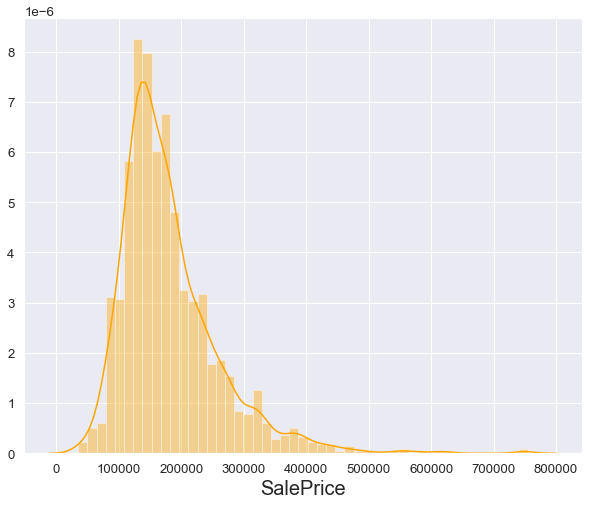

In [30]:
# SKEWED
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(masters['SalePrice'],color='orange')
plt.xlabel('SalePrice',fontsize=20)
print('Skew Dist:',masters['SalePrice'].skew())
print('Kurtosis Dist:',masters['SalePrice'].kurt())

# TARGET VARIABLE AFTER TRANSFORMATION#

Skew Dist: 0.12134661989685333
Kurtosis Dist: 0.809519155707878


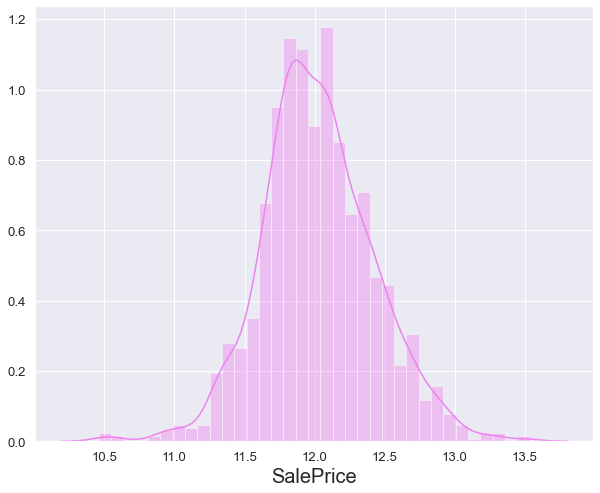

In [31]:
#BEFORE SKEWED
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(master['SalePrice'],color='violet')
plt.xlabel('SalePrice',fontsize=20)
print('Skew Dist:',master['SalePrice'].skew())
print('Kurtosis Dist:',master['SalePrice'].kurt())

# CORRELATION AFTER SKEWNESS  #

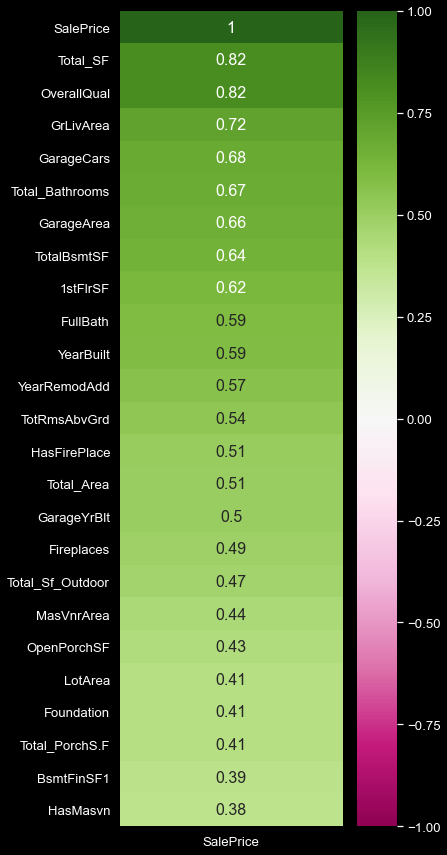

In [32]:
#CORRELATION CHECK BEFORE
master['Id']=master['Id'].astype(int)
plt.style.use('dark_background')
corr1_new_train=master.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr1_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)

In [33]:
#COPY2
final=master.copy()  
print(final.shape)

(2919, 94)


In [34]:
#####MODEL BUILDINGS### 1

master=pd.get_dummies(master,dtype='int8')
master.head()

X = master[master['SalePrice'].isnull()!=True].drop(['Id','SalePrice'], axis=1)
y = master[master['SalePrice'].isnull()!=True]['SalePrice']

X_test = master[master['SalePrice'].isnull()==True].drop(['Id','SalePrice'], axis=1)

#OVERFITTING REDUCTION
overfitted_features = overfit_reducer(X)
X.drop(overfitted_features,axis=1,inplace=True)
X_test.drop(overfitted_features,axis=1,inplace=True)
print('X.shape',X.shape)
print('X_test.shape',X_test.shape)

#SCALING
scaler = StandardScaler()
X=scaler.fit_transform(X)

#SPLITTING#
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


X.shape (1460, 95)
X_test.shape (1459, 95)


In [35]:
## SELECTING THE BEST MODEL###

pred=[]
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoost :', AdaBoostRegressor()],
           ['GradientBoosting: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    acc=mean_squared_error(y_val, predictions)
    pred.append(acc)
    print(name,acc)

DecisionTree : 0.03806506454718197
Linear Regression : 0.019626064920640427
RandomForest : 0.0198572833030603
KNeighbours : 0.03893781513355825
SVM : 0.033462535716686045
AdaBoost : 0.029957599779516793
GradientBoosting:  0.018185958984890074
[21:35:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost:  0.018322010901510755
CatBoost:  0.01626433191489045
Lasso:  0.16552915223328796
Ridge:  0.01913350461741032
BayesianRidge:  0.01753510513289366
ElasticNet:  0.16552915223328796
HuberRegressor:  0.01835983244175959


In [36]:
##########RIDGE REGRESSION##########

list1=[0.0018,0.002,0.005,0.08,0.09,0.1,0.5]
list2=[]
list3=[]
list4=[]
for i in list1:
    ridge_reg = Ridge(alpha=i,normalize=True)
    ridge_reg.fit(x_train,y_train)
    y_pred_r=ridge_reg.predict(x_val)
    r2score_r= r2_score(y_val,y_pred_r)
    mean_squared_errors=mean_squared_error(y_val, y_pred_r)
    mean_absolute_errors=mean_absolute_error(y_val,y_pred_r)
    list2.append(r2score_r)
    list3.append(mean_squared_errors)
    list4.append(mean_absolute_errors)
     
ridge_rscore_df=pd.DataFrame({"ALPHA":list1,"R2SCORE":list2,'MSE':list3,'MAE':list4})
ridge_rscore_df 



,ALPHA,R2SCORE,MSE,MAE
0,0.0018,0.886348,0.018807,0.093649
1,0.0020,0.886669,0.018754,0.093520
2,0.0050,0.889562,0.018275,0.092307
3,0.0800,0.894161,0.017514,0.090004
4,0.0900,0.894087,0.017526,0.090118
5,0.1000,0.893983,0.017544,0.090255
6,0.5000,0.884617,0.019094,0.096003


In [91]:
#USING KFOLD#
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(x_train, y_train)
y_head=ridgecv_reg.predict(x_val)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_val,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_val,y_head))

----------RidgeCV----------
R square Accuracy:  0.897349243459409
Mean Absolute Error Accuracy:  0.0867403299438609
Mean Squared Error Accuracy:  0.014879708861208865


In [37]:
#ELASTIC NET#
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

elasticv_reg= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(x_train, y_train)
y_head=elasticv_reg.predict(x_val)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_val,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_val,y_head))

----------ElasticNetCV----------
R square Accuracy:  0.8948052686535541
Mean Absolute Error Accuracy:  0.08991972118001273
Mean Squared Error Accuracy:  0.01740757382772351


In [38]:
#LASSO#

kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(x_train, y_train)
y_head=lassocv_reg.predict(x_val)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_val,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_val,y_head))
#THE rooted mean square error
print("Rooted Mean Sq Error: %.2f%"% np.sqrt(mean_squared_error(y_val,y_head)))

----------LassoCV----------
R square Accuracy:  0.8948052686535541
Mean Absolute Error Accuracy:  0.08991972118001273
Mean Squared Error Accuracy:  0.01740757382772351


In [39]:
### GBM###
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model=model.fit(x_train, y_train)

y_predicted = model.predict(x_val)
print('-'*10+'GBM'+'-'*10)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, y_predicted))
#The Rsquare
print('R square Accuracy: ',r2_score(y_val,y_predicted))
#The mean absoloute error
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_predicted))
#THE rooted mean square error
print("Rooted Mean Sq Error: %.2f%"% np.sqrt(mean_squared_error(y_val,y_predicted)))

----------GBM----------
Mean squared error: 0.02
Test Variance score: 0.89
R square Accuracy:  0.8887925588049099
Mean Absolute Error Accuracy:  0.08921748666811559


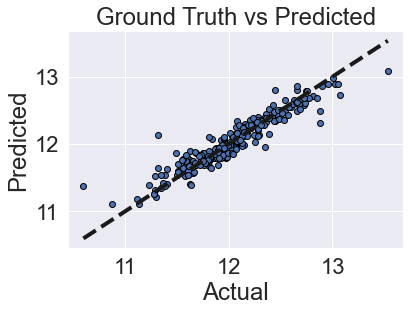

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

# GRADIENT HYPERPARAMETER OPTIMIZATION#

In [63]:
#4.GBM

gbmr = GradientBoostingRegressor()
gb_grid = {
    'n_estimators'     : range(100,1000,100),
    'max_depth'        : [5,10,15,20,25,35,None],
    'loss'             :['ls','lad','huber','quantile'],
    'subsample'        : [0.8, 0.9, 1.0],
    'min_samples_leaf' : [1,2,5,10],
    'min_samples_split': [2,5,10,15,100],
    'learning_rate'    : [0.1,0.03,0.4,0.5,0.7]

}

cv = KFold(n_splits=10, shuffle=True, random_state=42)
# Set up the random search with 4-fold cross validation
random_cvs = RandomizedSearchCV(estimator=gbmr,
            param_distributions=gb_grid,
            cv=cv, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cvs.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (random_cvs.best_score_, random_cvs.best_params_))
means = random_cvs.cv_results_['mean_test_score']
stds = random_cvs.cv_results_['std_test_score']
params = random_cvs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.4min finished


Best: -0.016960 using {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 10, 'loss': 'ls', 'learning_rate': 0.03}
-0.019673 (0.003653) with: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'loss': 'ls', 'learning_rate': 0.03}
-0.019669 (0.003184) with: {'subsample': 1.0, 'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 10, 'loss': 'ls', 'learning_rate': 0.1}
-0.024996 (0.005414) with: {'subsample': 0.9, 'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 20, 'loss': 'huber', 'learning_rate': 0.5}
-0.017674 (0.004077) with: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 25, 'loss': 'lad', 'learning_rate': 0.1}
-0.022063 (0.005196) with: {'subsample': 0.8, 'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 35, 'loss': 'lad', 'learning_rat

# APPLY BEST PARAMETERS#

In [64]:
params ={'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 10, 
         'loss': 'ls', 'learning_rate': 0.03}


models=ensemble.GradientBoostingRegressor(**params)
models=models.fit(x_train, y_train)

y_predictedr = model.predict(x_val)
print('-'*10+'GBM'+'-'*10)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, y_predictedr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, y_predictedr))
#The Rsquare
print('R square Accuracy: ',r2_score(y_val,y_predictedr))
#The mean absoloute error
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_predictedr))
#THE rooted mean square error
print("Rooted Mean Sq Error: %.2f%"% np.sqrt(mean_squared_error(y_val,y_predictedr)))

----------GBM----------
Mean squared error: 0.00
Test Variance score: 0.97
R square Accuracy:  0.9671884394634213
Mean Absolute Error Accuracy:  0.04846770767265575


# XG-BOOST HYPERPARAMETER OPTIMISE#

In [93]:

## Hyper Parameter Optimization
regressor = XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

cv = KFold(n_splits=10, shuffle=True, random_state=42)
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=cv, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (random_cv.best_score_, random_cv.best_params_))
means = random_cv.cv_results_['mean_test_score']
stds = random_cv.cv_results_['std_test_score']
params = random_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


[18:36:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.016167 using {'n_estimators': 1100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.75}
-0.021228 (0.005034) with: {'n_estimators': 1500, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.2, 'booster': 'gblinear', 'base_score': 0.75}
-0.017294 (0.003366) with: {'n_estimators': 1100, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 1}
-0.021228 (0.005034) with: {'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': 0.1, 'booster': 'gblinear', 'base_score': 0.75}
-0.016626 (0.003709) with: {'n_estimators': 900, 'min_child_weight': 4, 'max_depth': 15, 'learning_rate': 0.05, 'booster': 'gbtree', 'base_score': 0.5}
-0.017322 (0.002586) with: {'n_estimators': 1500, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.15, 'booster': 'gbt

In [42]:
#APPLYING BEST SETTINGS#

ms=XGBRegressor(n_estimators= 1100, min_child_weight= 2, max_depth=5 , learning_rate= 0.1,
                booster= 'gbtree', base_score= 0.75)
ms.fit(x_train,y_train)

y_predicteds = model.predict(x_val)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, y_predicteds))
print('R square Accuracy: ',r2_score(y_val,y_predicteds))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_predicteds))
print("Rooted Mean Sq Error: %.2f%"% np.sqrt(mean_squared_error(y_val,y_predicteds)))

[21:38:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error: 0.02
R square Accuracy:  0.8887925588049099
Mean Absolute Error Accuracy:  0.08921748666811559


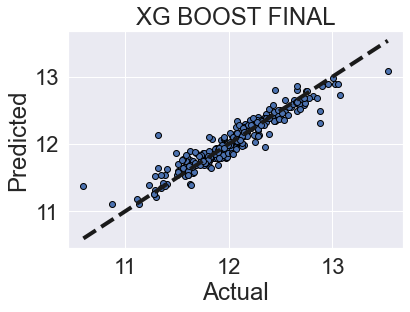

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_predicteds, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("XG BOOST ")
plt.show()

In [194]:
X_test=np.array(X_test)
sd=np.exp(ms.predict(X_test))
submission = pd.DataFrame()
submission['Id'] = master[master['SalePrice'].isnull()==True]['Id']
submission['SalePrice'] = sd
submission.to_csv('rtr.csv', index=False, header=True)
submission.shape


(1459, 2)

# BEST SCORE MSE XGBOOST#

In [61]:
err = []
y_pred_tot_lgm = []


X=np.array(X)
y=np.array(y)
X_test=np.array(X_test)
fold = KFold(n_splits=15, shuffle=True, random_state=42)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = XGBRegressor(n_estimators= 1100, min_child_weight= 2, max_depth=5 , learning_rate= 0.1,
                booster= 'gbtree', base_score= 0.75)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict(x_val)
    print(i, " err_lgm: ", mean_squared_error(y_val, pred_y))
    err.append(mean_squared_error(y_val, pred_y))
    pred_test = m.predict(X_test)
    i = i + 1
    y_pred_tot_lgm.append(pred_test)
    

[22:05:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10.1565	validation_1-rmse:10.1372
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.029427	validation_1-rmse:0.098558
Stopping. Best iteration:
[102]	validation_0-rmse:0.053263	validation_1-rmse:0.097709

1  err_lgm:  0.009547006319234668
[22:05:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10.1567	validation_1-rmse:10.1342
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.028379	validation_1-rmse:0.131607
Stopping. Best iteration:
[169]	validation_0-rmse:0.033194	validation_1-rmse:0.130954

2  err_l

In [62]:
xgboost_pred=y_pred_tot_lgm[5]
print(xgboost_pred)

[12.722005 12.803118 12.836206 ... 12.846814 12.746753 12.836206]
